<a href="https://colab.research.google.com/github/Jaranhee/2025-1-myclass-BDA/blob/main/inclass/05w_B_wed_0402_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05주차 수업

In [1]:
import numpy as np
import pandas as pd

In [3]:
df_raw = pd.DataFrame({'var1' : [1, 2, 1],
                       'var2' : [2, 3, 2],
                       'var3' : [10, 20, 30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [4]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [5]:
df_new.rename(columns = {'var2': 'v2'})

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [6]:
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [7]:
df_new.rename(columns = {'var2': 'v2'}, inplace=True)
df_new

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [8]:
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [9]:
df_new

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [10]:
df_new.rename(index = {0: "x", 1: "y", 2: "z"}, inplace=True)
df_new

,var1,v2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [11]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [12]:
df

,A,B
0,1,4
1,2,5
2,3,6


### 05-3 파생변수 만들기: 시험예상

In [13]:
df = pd.DataFrame({'var1' : [4, 3, 8],
                   'var2' : [2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [14]:
df1 = df.copy()
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [15]:
df1['var_sum'] = df1['var1'] + df1['var2']
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [16]:
# 새로운 열 var_mean <- var1과 var2의 평균
df1["var_mean"] = (df1["var1"] + df1["var2"]) / 2
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [17]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [18]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [19]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [20]:
df2['my_sum'] = df2.sum(axis='columns')
df2

,var1,var2,my_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [21]:
df2[["var1","var2"]]

,var1,var2
0,4,2
1,3,6
2,8,1


In [22]:
# 새로운 열 var_mean <- var1과 var2의 평균
df2["my_mean"] = df2[["var1","var2"]].mean(axis=1) # 시험 예상
df2

,var1,var2,my_sum,my_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [23]:
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


### mpg 통합 연비 변수 만들기

In [25]:
# mpg 데이터 불러오기
!git clone https://github.com/ai7dnn/data.git
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(8)

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.51 MiB/s, done.
Resolving deltas: 100% (4/4), done.


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
98,ford,mustang,5.4,2008,8,manual(m6),r,14,20,p,subcompact
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize
90,ford,mustang,3.8,1999,6,manual(m5),r,18,26,r,subcompact
220,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact
74,ford,expedition 2wd,4.6,1999,8,auto(l4),r,11,17,r,suv
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [26]:
# 통합 연비 변수(total) 만들기, total <= cty + hwy의 평균: 시험 예상
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2  # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [27]:
# 통합 연비 변수(mpg_mean) 만들기, total <= cty + hwy의 평균: 시험 예상
mpg['mpg_mean'] = mpg[['cty', 'hwy']].mean(axis='columns')  # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [28]:
sum(mpg['total']) / len(mpg)

20.14957264957265

In [29]:
mpg.total.describe()

,total
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.5 MB/s eta 0:00:00


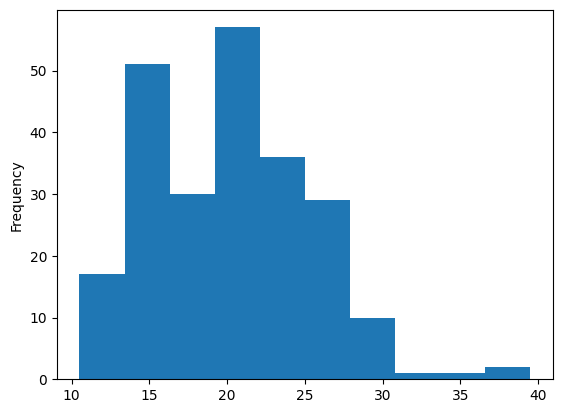

In [34]:
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib

mpg['total'].plot.hist();

In [37]:
%config InlineBackend.figure_format = 'retina'